# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 6: *HoughTransformEllipses*
Ellipse detection by the Hough transform
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageF, plotImageL, createScaleImageL, createImageNF
from ImageOperatorsUtilities import applyCannyEdgeDetector
from ImagePropertiesUtilities import imageArgMax, peakDetectorImageL
from PlotUtilities import plot3DHistogram 
from PrintUtilities import printTextSameLine

# Math and iteration
from math import pi, sin, cos
from timeit import itertools

### Parameters:
    pathToDir = Input image directory 
    imageName = Input image name
    gaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold
    majorAxisRange = Integer range of possible mayor axis values
    minorAxisRange = Integer range of possible minor axis values
    angleRange = Possible rotations in degrees 

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter6/Input/")
imageName = "Cup.png"
gaussianKernelSize = 5
sobelKernelSize = 3
upperT = 0.4
lowerT = 0.2
majorAxisRange = [45,65]  
minorAxisRange = [20,30]  
angleRange = [0, 4]       

### Read and show input image

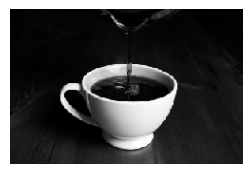

In [3]:
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 3)

### Compute edges

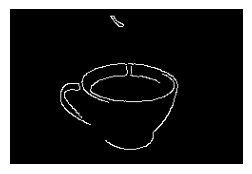

In [4]:
magnitude, angle = applyCannyEdgeDetector(inputImage, gaussianKernelSize, sobelKernelSize, upperT, lowerT)
plotImageF(magnitude, figureSize = 3)

### Gather evidence 

In [5]:
# Five dimensional accumulator 
majorAxisSize = majorAxisRange[1] - majorAxisRange[0]
minorAxisSize = minorAxisRange[1] - minorAxisRange[0]
angleSize = angleRange[1] - angleRange[0]
accumulator = createImageNF(width, height, majorAxisSize, minorAxisSize, angleSize)

for x,y in itertools.product(range(0, width), range(0, height)):
    printTextSameLine(x)
    if magnitude[y,x] != 0:
        for majAxis, minAxis in itertools.product(range(0, majorAxisSize),          \
                                                  range(0, minorAxisSize)):
            a = majAxis + majorAxisRange[0]
            b = minAxis + minorAxisRange[0]
            for rot in range(0,angleSize):
                rotAngle = ((rot + angleRange[0]) * pi) / 180.0  
                for m in range(0,360):
                    angle = (m * pi) / 180.0
                    
                    x0 = x+ a*cos(angle)*cos(rotAngle) - b*sin(angle)*sin(rotAngle)
                    y0 = y+ a*cos(angle)*sin(rotAngle) + b*sin(angle)*cos(rotAngle)
                    bX0 = int(x0)
                    bY0 = int(y0)
                    
                    if bX0>0 and bX0<width-1 and bY0>0 and bY0<height-1:
                        wX = x0 - bX0
                        wY = y0 - bY0
                        accumulator[bY0,bX0,majAxis,minAxis,rot] += (1.0-wX)+(1.0-wY)         
                        accumulator[bY0+1,bX0,majAxis,minAxis,rot] += wX + (1.0-wY)
                        accumulator[bY0,bX0+1,majAxis,minAxis,rot] += (1.0-wX) + wY         
                        accumulator[bY0+1,bX0+1,majAxis,minAxis,rot] +=  wX + wY  
                          

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 

### Find maximum

In [6]:
maximumPos = imageArgMax(accumulator)

### Plot a slide of the accumulator

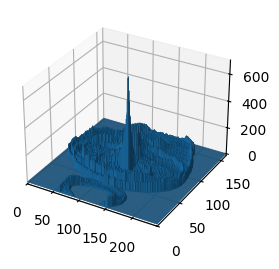

In [7]:
plot3DHistogram(accumulator[:,:,maximumPos[2], maximumPos[3], maximumPos[4]])

### Draw ellipse on output image

In [9]:
outputImage = createScaleImageL(inputImage, 0.5)

y = maximumPos[0]
x = maximumPos[1]
majAxis = maximumPos[2]
minAxis = maximumPos[3]
rot = maximumPos[4]

rotAngle = ((rot+angleRange[0]) * pi) / 180.0  
a = majAxis + majorAxisRange[0]
b = minAxis  + minorAxisRange[0]
#print (a,b,rotAngle, x,y, maximumPos[4])

for m in range(0,360):
    angle = (m * pi) / 180.0
    x0 = int(x+ a*cos(angle)*cos(rotAngle) - b*sin(angle)*sin(rotAngle))
    y0 = int(y+ a*cos(angle)*sin(rotAngle) + b*sin(angle)*cos(rotAngle))
    if x0<width and x0>0 and y0<height and y0>0:
        outputImage[y0,x0] = 255

### Show image with detected ellipse         

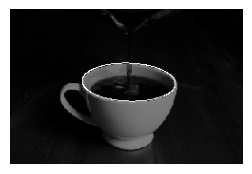

In [10]:
plotImageL(outputImage, figureSize = 3)